<a href="https://colab.research.google.com/github/NasimulNabil/Credit-Recovery-Old-/blob/main/Prediction_of_Credit_Recovery_(Latest_4_using_K_Fold_Cross_Validation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Research/loan_data_feature.csv')
df.head()

,long_term,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,pay_month_01,pay_month_02,pay_month_03,pay_month_04,pay_month_05,pay_month_06,bill_amount_01,bill_amount_02,bill_amount_03,bill_amount_04,bill_amount_05,bill_amount_06,number_of_loan_ac,good_credit,total_bl_countMoreThanOne,total_bl_countOne,repayment_frequencyMonth,repayment_frequencyMoreThanMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
0,1,0,1,0,0,0,1,1,1.0,2.0,732,1097.0,64800.0,394,22.0,9.0,37232.0,50000.0,50000.0,19350.0,6582.0,43200.0,1800.0,36,1.0,1.0,1.0,1,1,1,14850.0,14850.0,18450.0,20250.0,22050.0,23850.0,1,0,0,1,1,0,114300.0,19050.0000,6.0,1.000000,1.157407,19050.000000,68.306011,10.750000
1,1,1,1,0,0,0,1,0,1.0,3.0,606,1741.0,426000.0,487,33.0,13.0,278523.0,300000.0,300000.0,21500.0,300023.0,213000.0,14200.0,30,8000.0,1.0,1.0,1000,1000,1500,123500.0,137700.0,151900.0,165600.0,178800.0,191500.0,1,0,0,1,1,0,949000.0,158166.6667,11502.0,1917.000000,1.408451,82.507390,495.049505,1.514085
2,1,1,1,0,0,0,1,0,4.0,3.0,618,1026.0,511200.0,660,37.0,13.0,266854.0,300000.0,300000.0,33200.0,300054.0,213000.0,14200.0,36,1.0,1.0,1.0,5000,1,1,113300.0,127500.0,141700.0,151400.0,165600.0,179800.0,1,0,0,1,1,0,879300.0,146550.0000,5005.0,834.166667,1.408451,175.684316,485.436893,2.338028
3,1,1,1,0,0,0,1,0,4.0,3.0,564,878.0,511200.0,715,28.0,13.0,280000.0,300000.0,300000.0,20000.0,300000.0,184600.0,14200.0,36,1.0,1.0,1.0,1,1,1,93600.0,107800.0,122000.0,136200.0,150400.0,164600.0,1,0,0,1,1,0,774600.0,129100.0000,6.0,1.000000,1.625135,129100.000000,531.914894,1.408451
4,1,1,1,1,0,1,1,0,1.0,6.0,425,2020.0,540288.0,1065,45.0,13.0,436384.0,1175000.0,1175000.0,16000.0,52384.0,157584.0,11256.0,48,1.0,1.0,1.0,1,1,5000,90304.0,101560.0,112816.0,124072.0,135328.0,141584.0,5,1,0,1,1,0,705664.0,117610.6667,5005.0,834.166667,7.456341,140.991808,2764.705882,1.421464


In [ ]:
df.drop(['pay_month_01','pay_month_02','pay_month_03','pay_month_04','pay_month_05','pay_month_06',\
        'bill_amount_01','bill_amount_02','bill_amount_03','bill_amount_04','bill_amount_05','bill_amount_06',\
         'total_bl_countMoreThanOne','repayment_frequencyMoreThanMonth','long_term'],axis=1,\
        inplace=True)
df.shape

(4600, 35)

In [ ]:
x = df.drop(['good_credit'],axis=1)
x.head()

,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,number_of_loan_ac,total_bl_countOne,repayment_frequencyMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
0,0,1,0,0,0,1,1,1.0,2.0,732,1097.0,64800.0,394,22.0,9.0,37232.0,50000.0,50000.0,19350.0,6582.0,43200.0,1800.0,36,1,1,1,114300.0,19050.0000,6.0,1.000000,1.157407,19050.000000,68.306011,10.750000
1,1,1,0,0,0,1,0,1.0,3.0,606,1741.0,426000.0,487,33.0,13.0,278523.0,300000.0,300000.0,21500.0,300023.0,213000.0,14200.0,30,1,1,1,949000.0,158166.6667,11502.0,1917.000000,1.408451,82.507390,495.049505,1.514085
2,1,1,0,0,0,1,0,4.0,3.0,618,1026.0,511200.0,660,37.0,13.0,266854.0,300000.0,300000.0,33200.0,300054.0,213000.0,14200.0,36,1,1,1,879300.0,146550.0000,5005.0,834.166667,1.408451,175.684316,485.436893,2.338028
3,1,1,0,0,0,1,0,4.0,3.0,564,878.0,511200.0,715,28.0,13.0,280000.0,300000.0,300000.0,20000.0,300000.0,184600.0,14200.0,36,1,1,1,774600.0,129100.0000,6.0,1.000000,1.625135,129100.000000,531.914894,1.408451
4,1,1,1,0,1,1,0,1.0,6.0,425,2020.0,540288.0,1065,45.0,13.0,436384.0,1175000.0,1175000.0,16000.0,52384.0,157584.0,11256.0,48,5,1,1,705664.0,117610.6667,5005.0,834.166667,7.456341,140.991808,2764.705882,1.421464


In [ ]:
x.shape

(4600, 34)

In [ ]:
y = df['good_credit']
y

0       0
1       0
2       0
3       0
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: good_credit, Length: 4600, dtype: int64

In [ ]:
y.value_counts()

0    3698
1     902
Name: good_credit, dtype: int64

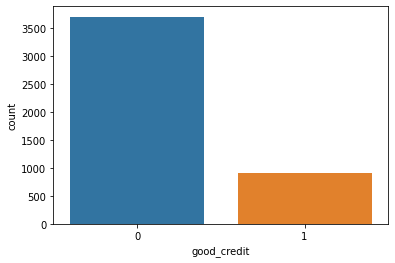

In [ ]:
import seaborn as sns
sns.countplot(x='good_credit',data=df)

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x,y)
unique, counts = np.unique(y_sm, return_counts=True)
dict(zip(unique, counts))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


{0: 3698, 1: 3698}

In [ ]:
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
scale_inputs = standardization.fit_transform(x_sm)

In [ ]:
x_sm = scale_inputs
x_sm

array([[-1.66448038,  0.34800207, -0.46161941, ..., -0.11257379,
        -0.29920015,  1.30253391],
       [ 0.64135153,  0.34800207, -0.46161941, ..., -0.23620966,
         0.10284163, -0.53108059],
       [ 0.64135153,  0.34800207, -0.46161941, ..., -0.23560231,
         0.09378544, -0.36750233],
       ...,
       [ 0.64135153,  0.34800207,  2.28718808, ..., -0.23674553,
         0.44849273,  1.53626491],
       [ 0.64135153,  0.34800207, -0.46161941, ..., -0.23675399,
         0.1555491 ,  1.55069752],
       [ 0.64135153,  0.34800207, -0.46161941, ..., -0.14030168,
        -0.25632507, -0.60430543]])

In [ ]:
x_sm.shape

(7396, 34)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

models = []
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('Support Vector Machine',SVC()))
models.append(('Gaussian Naive Bayes',GaussianNB()))
models.append(('Bernoulli Naive Bayes',BernoulliNB()))
models.append(('XGBoost',XGBClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))

results = []
names = []
kfold = StratifiedKFold(n_splits=20, shuffle=True)

for name,model in models:
    fold_no = 1
    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    for train,test in kfold.split(x_sm,y_sm):
      model.fit(x_sm[train],y_sm[train])
      accuracy_score = model.score(x_sm[test],y_sm[test])
      y_pred = model.predict(x_sm[test])
      precision = precision_score(y_sm[test], y_pred)
      recall = recall_score(y_sm[test], y_pred)
      auc = roc_auc_score(y_sm[test], y_pred)
      acc_per_fold.append(accuracy_score)
      precision_per_fold.append(precision)
      recall_per_fold.append(recall)
      auc_per_fold.append(auc)
      fold_no = fold_no + 1 
    accuracy = np.array(acc_per_fold).mean()
    precision = np.array(precision_per_fold).mean()
    recall = np.array(recall_per_fold).mean()
    f1 = (2*precision*recall)/(precision+recall)
    auc = np.array(auc_per_fold).mean()
    results.append({
        'model': name,
        'Accuracy_Score':accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    msg = "%s : %f " % (name, accuracy)
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression : 0.686592 
Random Forest : 0.936998 
KNN : 0.843423 
Decision Tree : 0.869798 
Support Vector Machine : 0.801518 
Gaussian Naive Bayes : 0.544205 
Bernoulli Naive Bayes : 0.636835 
XGBoost : 0.899137 
AdaBoost : 0.872635 
Linear Discriminant Analysis : 0.680767 


In [ ]:
df = pd.DataFrame(results,columns = ['model','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.686592,0.746617,0.565442,0.643521,0.686594
1,Random Forest,0.936998,0.962920,0.909142,0.935258,0.936996
2,KNN,0.843423,0.830756,0.863443,0.846784,0.843426
3,Decision Tree,0.869798,0.859745,0.884799,0.872092,0.869790
4,Support Vector Machine,0.801518,0.844167,0.740944,0.789195,0.801519
5,Gaussian Naive Bayes,0.544205,0.525208,0.924019,0.669739,0.544209
6,Bernoulli Naive Bayes,0.636835,0.694680,0.489747,0.574485,0.636843
7,XGBoost,0.899137,0.956589,0.836401,0.892467,0.899136
8,AdaBoost,0.872635,0.907378,0.830711,0.867354,0.872632
9,Linear Discriminant Analysis,0.680767,0.751711,0.541927,0.629809,0.680780


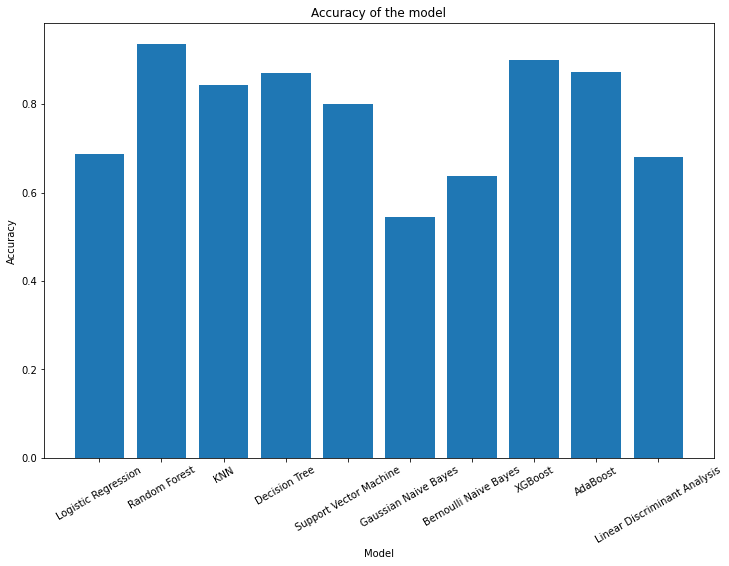

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.xticks(rotation=30)
plt.bar(df['model'],df['Accuracy_Score'])
plt.show()

### **ANN**

In [ ]:
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow import keras

kfold = StratifiedKFold(n_splits=20, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
auc_per_fold = []

for train, test in kfold.split(x_sm, y_sm):

  model = keras.Sequential([
        keras.layers.Dense(500,input_shape=(34,),activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),                            
  ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  model.fit(x_sm[train], y_sm[train],epochs=100)

  scores = model.evaluate(x_sm[test], y_sm[test])
  y_pred = model.predict(x_sm[test])
  y_pred = np.round(y_pred)
  y_pred = y_pred[:,0]
  precision = precision_score(y_sm[test], y_pred)
  recall = recall_score(y_sm[test], y_pred)
  auc = roc_auc_score(y_sm[test], y_pred)

  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
  print(f'Precision for fold {fold_no}: {precision}')
  print(f'Recall for fold {fold_no}: {recall}')
  print(f'AUC for fold {fold_no}: {auc}')

  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])
  precision_per_fold.append(precision)
  recall_per_fold.append(recall)
  auc_per_fold.append(auc)

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
220/220 [==============================] - 2s 5ms/step - loss: 0.5347 - accuracy: 0.7099
Epoch 2/100
220/220 [==============================] - 1s 5ms/step - loss: 0.4575 - accuracy: 0.7724
Epoch 3/100
220/220 [==============================] - 1s 5ms/step - loss: 0.4149 - accuracy: 0.8033
Epoch 4/100
220/220 [==============================] - 1s 5ms/step - loss: 0.3864 - accuracy: 0.8160
Epoch 5/100
220/220 [==============================] - 1s 5ms/step - loss: 0.3589 - accuracy: 0.8360
Epoch 6/100
220/220 [==============================] - 1s 5ms/step - loss: 0.3331 - accuracy: 0.8483
Epoch 7/100
220/220 [==============================] - 1s 5ms/step - loss: 0.3143 - accuracy: 0.8612
Epoch 8/100
220/220 [==============================] - 1s 5ms/step - loss: 0.2967 - accuracy: 0.8722
Epoch 9/100
220/220 [==============================] - 1s 5ms/step - loss: 0.2744 - accuracy: 0

In [ ]:
import numpy as np
loss = np.array(loss_per_fold).mean()
accuracy = np.array(acc_per_fold).mean()
precision = np.array(precision_per_fold).mean()
recall = np.array(recall_per_fold).mean()
f1 = (2*precision*recall)/(precision+recall)
auc = np.array(auc_per_fold).mean()

results_deep_learning = []
results_deep_learning.append({
    'model': "ANN",
    'Loss':loss,
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Loss','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,ANN,0.472758,0.914951,0.907163,0.925367,0.916175,0.914954


### **MLP**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

kfold = StratifiedKFold(n_splits=20, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
auc_per_fold = []

for train, test in kfold.split(x_sm, y_sm):

  mlp = MLPClassifier(hidden_layer_sizes=(800,700),max_iter=8000,activation='relu')
  mlp.fit(x_sm[train],y_sm[train])
  
  scores = mlp.score(x_sm[test],y_sm[test])
  y_pred = mlp.predict(x_sm[test])
  precision = precision_score(y_sm[test], y_pred)
  recall = recall_score(y_sm[test], y_pred)
  auc = roc_auc_score(y_sm[test], y_pred)

  print(f'Accuracy Score for fold {fold_no}: {scores}')
  print(f'Precision for fold {fold_no}: {precision}')
  print(f'Recall for fold {fold_no}: {recall}')
  print(f'AUC for fold {fold_no}: {auc}')

  acc_per_fold.append(scores)
  precision_per_fold.append(precision)
  recall_per_fold.append(recall)
  auc_per_fold.append(auc)

  fold_no = fold_no + 1

Accuracy Score for fold 1: 0.9135135135135135
Precision for fold 1: 0.9047619047619048
Recall for fold 1: 0.9243243243243243
AUC for fold 1: 0.9135135135135135
Accuracy Score for fold 2: 0.8513513513513513
Precision for fold 2: 0.8532608695652174
Recall for fold 2: 0.8486486486486486
AUC for fold 2: 0.8513513513513513
Accuracy Score for fold 3: 0.918918918918919
Precision for fold 3: 0.9057591623036649
Recall for fold 3: 0.9351351351351351
AUC for fold 3: 0.918918918918919
Accuracy Score for fold 4: 0.8972972972972973
Precision for fold 4: 0.893048128342246
Recall for fold 4: 0.9027027027027027
AUC for fold 4: 0.8972972972972973
Accuracy Score for fold 5: 0.9027027027027027
Precision for fold 5: 0.882051282051282
Recall for fold 5: 0.9297297297297298
AUC for fold 5: 0.9027027027027027
Accuracy Score for fold 6: 0.9081081081081082
Precision for fold 6: 0.9081081081081082
Recall for fold 6: 0.9081081081081082
AUC for fold 6: 0.9081081081081083
Accuracy Score for fold 7: 0.924324324324324

In [ ]:
import numpy as np

accuracy = np.array(acc_per_fold).mean()
precision = np.array(precision_per_fold).mean()
recall = np.array(recall_per_fold).mean()
f1 = (2*precision*recall)/(precision+recall)
auc = np.array(auc_per_fold).mean()

results_deep_learning = []
results_deep_learning.append({
    'model': "MLP",
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,MLP,0.906574,0.905385,0.908594,0.906987,0.906577


### **CNN**

In [ ]:
x_sm.shape

(7396, 34)

In [ ]:
x_sm = x_sm.reshape((len(x_sm),34,1))
x_sm.shape

(7396, 34, 1)

In [ ]:
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow import keras

kfold = StratifiedKFold(n_splits=20, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
auc_per_fold = []

for train, test in kfold.split(x_sm, y_sm):

  model = keras.Sequential([
        keras.layers.Conv1D(filters=200,kernel_size=3,padding='same',activation='relu',input_shape=(34,1)),
        keras.layers.MaxPooling1D((2,)),
    
        keras.layers.Conv1D(filters=100,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),                           
        
        keras.layers.Conv1D(filters=50,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),                           
        
        keras.layers.Conv1D(filters=30,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPooling1D((2,)),

        keras.layers.Flatten(),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),                           
  ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  model.fit(x_sm[train], y_sm[train], epochs=100)

  scores = model.evaluate(x_sm[test], y_sm[test])
  y_pred = model.predict(x_sm[test])
  y_pred = np.round(y_pred)
  y_pred = y_pred[:,0]
  precision = precision_score(y_sm[test], y_pred)
  recall = recall_score(y_sm[test], y_pred)
  auc = roc_auc_score(y_sm[test], y_pred)

  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
  print(f'Precision for fold {fold_no}: {precision}')
  print(f'Recall for fold {fold_no}: {recall}')
  print(f'AUC for fold {fold_no}: {auc}')

  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])
  precision_per_fold.append(precision)
  recall_per_fold.append(recall)
  auc_per_fold.append(auc)

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
220/220 [==============================] - 8s 29ms/step - loss: 0.5790 - accuracy: 0.6661
Epoch 2/100
220/220 [==============================] - 6s 29ms/step - loss: 0.4875 - accuracy: 0.7548
Epoch 3/100
220/220 [==============================] - 6s 28ms/step - loss: 0.4491 - accuracy: 0.7802
Epoch 4/100
220/220 [==============================] - 6s 26ms/step - loss: 0.4076 - accuracy: 0.8064
Epoch 5/100
220/220 [==============================] - 4s 20ms/step - loss: 0.3845 - accuracy: 0.8214
Epoch 6/100
220/220 [==============================] - 3s 15ms/step - loss: 0.3628 - accuracy: 0.8359
Epoch 7/100
220/220 [==============================] - 3s 15ms/step - loss: 0.3449 - accuracy: 0.8454
Epoch 8/100
220/220 [==============================] - 3s 15ms/step - loss: 0.3186 - accuracy: 0.8587
Epoch 9/100
220/220 [==============================] - 3s 15ms/step - loss: 0.2983 - ac

In [ ]:
import numpy as np
loss = np.array(loss_per_fold).mean()
accuracy = np.array(acc_per_fold).mean()
precision = np.array(precision_per_fold).mean()
recall = np.array(recall_per_fold).mean()
f1 = (2*precision*recall)/(precision+recall)
auc = np.array(auc_per_fold).mean()

results_deep_learning = []
results_deep_learning.append({
    'model': "CNN",
    'Loss':loss,
    'Accuracy_Score':accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': auc
})

df = pd.DataFrame(results_deep_learning,columns = ['model','Loss','Accuracy_Score','Precision','Recall','F1-Score','AUC'])
df

,model,Loss,Accuracy_Score,Precision,Recall,F1-Score,AUC
0,CNN,0.583615,0.903058,0.892673,0.917241,0.904791,0.903052
